<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0922/blob/main/res.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
model = ResNet50V2(include_top=False, input_shape=(224, 224, 3))
model.summary()

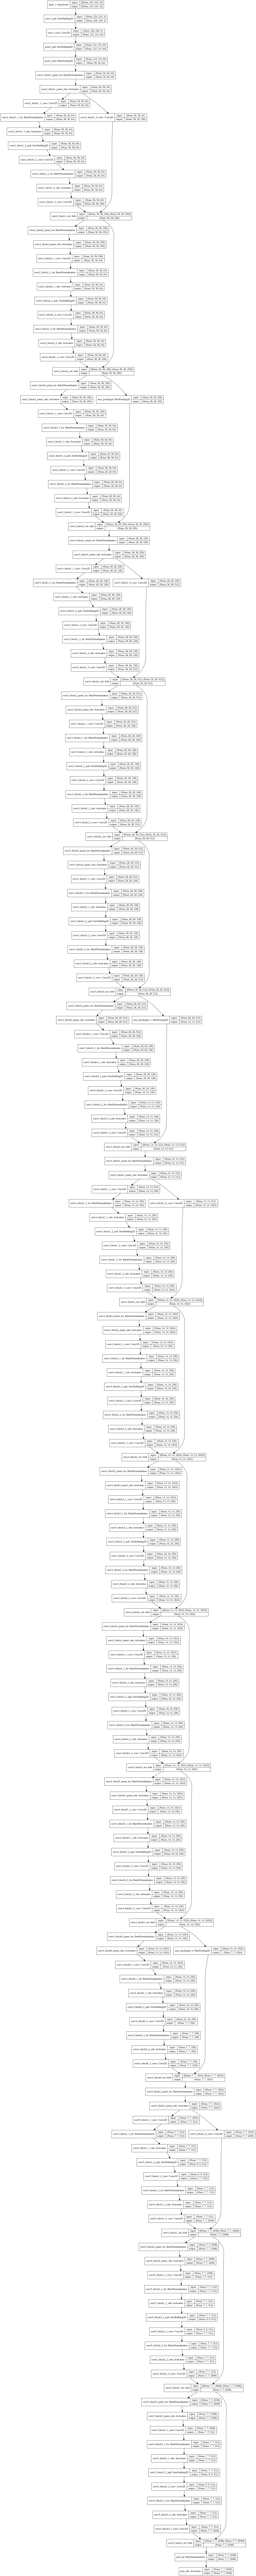

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="res.png", show_shapes=True)

In [ ]:
# 1 x 1 卷積
w = model.get_layer("conv3_block2_1_conv").get_weights()[0]
print(w.shape)
# 3 x 3 卷積
w = model.get_layer("conv3_block2_2_conv").get_weights()[0]
print(w.shape)
# 1 x 1 捲機
w = model.get_layer("conv3_block2_3_conv").get_weights()[0]
print(w.shape)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Add

i = Input(shape=(28, 28, 512))
# 差值
x = Conv2D(128, 1, padding="same", activation="relu")(i)
x = Conv2D(128, 3, padding="same", activation="relu")(x)
x = Conv2D(512, 1, padding="same")(x)
# 加法(原本值+差值)
o = Add()([x, i])
mymodel = Model(inputs=[i], outputs=[o])
mymodel.summary()

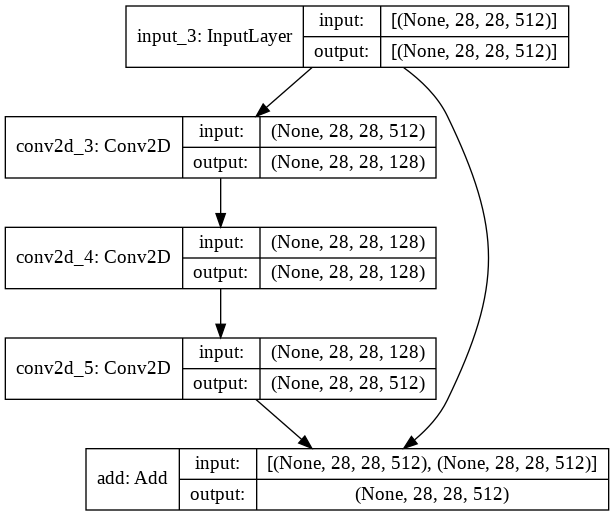

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(mymodel, to_file="myres.png", show_shapes=True)